In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


copy from https://blog.naver.com/ckdgus1433/221443838135

# 모듈 임포팅

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 로딩

In [3]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (_, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Normalization

In [4]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255.

# Flattening

In [5]:
x_train = np.reshape(x_train, (len(x_train), 784))

# 영상 보기

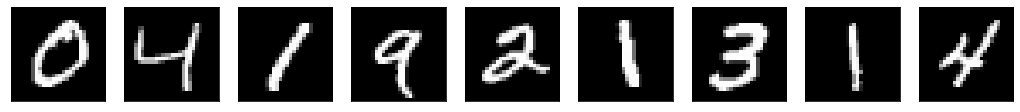

In [6]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 모델 정의와 학습 실행

In [8]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(x_train, x_train, 
          epochs=100,
          batch_size=256,
          shuffle=True)


Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 192us/sample - loss: 0.2439
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1500
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1319
Epoch 4/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1231
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1164
Epoch 6/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1118
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1087
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1063
Epoch 9/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1042
Epoch 10/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1027
Epoch 11/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0

# 결과 확인

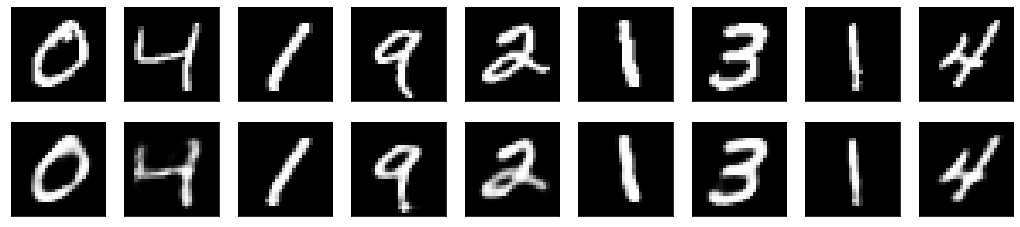

In [13]:
reconstruted = model.predict(x_train)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()